In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('election2024.csv')

In [6]:
data

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [8]:
data.shape

(1600, 16)

In [9]:
# Null values weightage
data.isna().sum() / len(data) * 100


id                      0.0000
sex                     0.0000
age                     0.0000
federal_district        0.0000
type_of_city            0.0000
knows_election_date     0.0000
will_vote               0.0000
candidate               0.0000
television_usage        0.0000
internet_usage          0.0000
education               0.0000
income                  0.0000
employment              0.0000
job_type               56.7500
company_type           45.0625
weight1                 0.0000
dtype: float64

In [10]:
data.drop('company_type', axis=1, inplace=True)
data.drop('job_type', axis=1, inplace=True)
data

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,0.995849


In [11]:
data.isna().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
weight1                0
dtype: int64

In [13]:
data.sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
data.sex = data.sex.apply(lambda x: 1 if x == 'male' else 0)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   int64  
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  weight1              1600 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 175.1+ KB


In [ ]:
Checking other columns now

In [17]:
data.federal_district.unique()

array(['north caucasian', 'volga', 'northwestern', 'southern', 'central',
       'ural', 'siberian', 'far eastern'], dtype=object)

In [18]:
data.type_of_city.unique()

array(['village', 'city with population of less than 50k',
       'city with population of 1 million and higher',
       'city with population of 50-100k',
       'city with population of 100-500k', 'settlement',
       'city with population of 500-950k'], dtype=object)

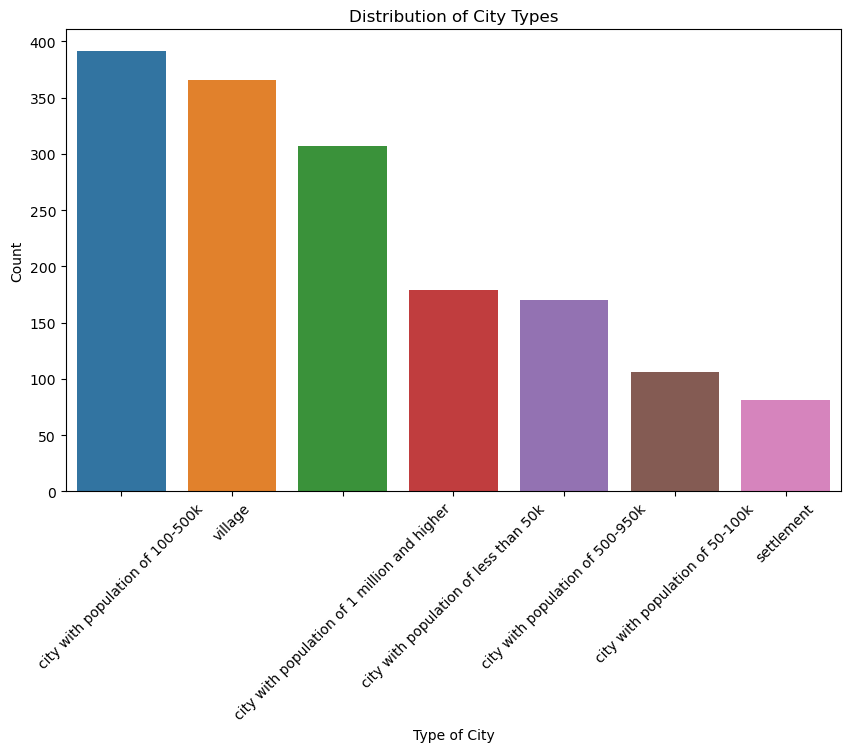

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type_of_city', data=data, order=data['type_of_city'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of City Types')
plt.xlabel('Type of City')
plt.ylabel('Count')
plt.show()

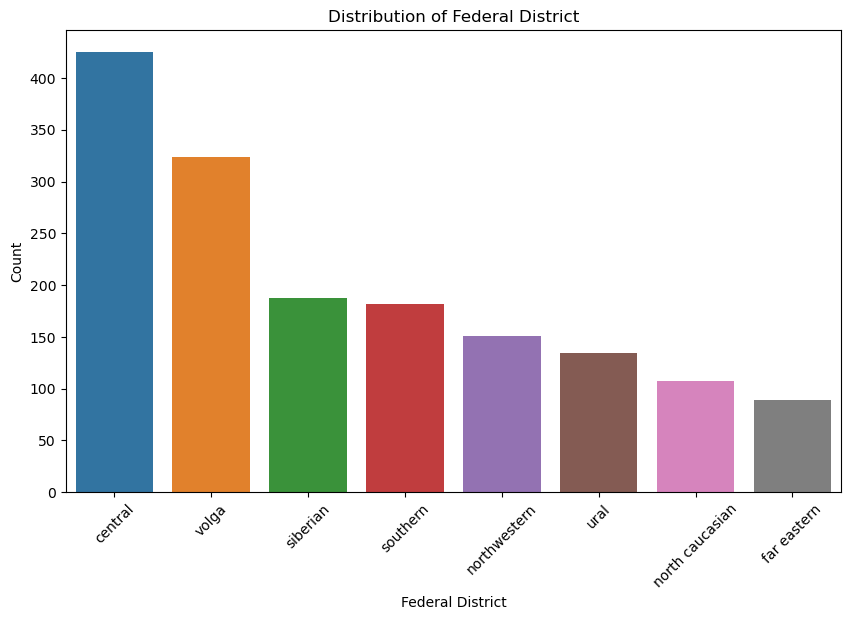

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='federal_district', data=data, order=data['federal_district'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Federal District')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.show()

In [21]:
data.knows_election_date.unique()

array(['named correct date', 'not sure or no answer', 'wrong answer',
       'named correct year'], dtype=object)

In [22]:
data.knows_election_date = data.knows_election_date.apply(lambda x: 1 if x == "named correct date" else 0)

In [23]:
data.knows_election_date = data.knows_election_date.astype(int)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   int64  
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   int64  
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  weight1              1600 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 175.1+ KB


In [25]:
data.will_vote.unique()

array(['not sure', 'definitely yes', 'likely no', 'definitely no',
       'likely yes', 'struggle to answer'], dtype=object)

In [26]:
data.will_vote = data.will_vote.apply(lambda x: 1 if x == 'definitely yes' or x == 'likely yes' else 0 )

In [27]:
data.will_vote = data.will_vote.astype(int)

In [28]:
data.info("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   int64  
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   int64  
 6   will_vote            1600 non-null   int64  
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  weight1              1600 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 175.1+ KB


In [29]:
data.candidate.value_counts()

Putin                 1128
struggle to answer     164
will not take part      96
Davankov                67
Kharitonov              63
Slutskiy                55
spoilt vote             27
Name: candidate, dtype: int64

In [30]:
data['candidate'] = data['candidate'].str.strip().str.lower()

In [31]:
# Performing OHE
encoded_candidates = pd.get_dummies(data['candidate'], prefix='candidate')

In [32]:
encoded_candidates

,candidate_davankov,candidate_kharitonov,candidate_putin,candidate_slutskiy,candidate_spoilt vote,candidate_struggle to answer,candidate_will not take part
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
1595,0,0,0,0,0,0,1
1596,0,0,0,0,0,1,0
1597,0,0,1,0,0,0,0
1598,0,0,1,0,0,0,0


In [33]:
data = pd.concat([data, encoded_candidates], axis=1)

In [34]:
data.head(10)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,...,income,employment,weight1,candidate_davankov,candidate_kharitonov,candidate_putin,candidate_slutskiy,candidate_spoilt vote,candidate_struggle to answer,candidate_will not take part
0,07169ed8148ce047,1,18.0,north caucasian,village,1,0,putin,several times a week,over 4 hours a day,...,very high,entrepreneur,1.445172,0,0,1,0,0,0,0
1,0716a4f3354cecdd,1,23.0,north caucasian,village,1,0,putin,once half a year,over 4 hours a day,...,very high,work for hire,1.445172,0,0,1,0,0,0,0
2,0716889b304ce79c,1,20.0,volga,city with population of less than 50k,1,1,putin,several times a week,over 4 hours a day,...,very high,work for hire,1.301691,0,0,1,0,0,0,0
3,07168e28b5cce563,1,22.0,northwestern,city with population of 1 million and higher,0,0,davankov,several times a week,over 4 hours a day,...,very high,unemployed,1.538628,1,0,0,0,0,0,0
4,0716a563914ce549,1,21.0,southern,city with population of 1 million and higher,1,1,putin,does not watch,over 4 hours a day,...,very high,employed student,1.967015,0,0,1,0,0,0,0
5,0716aac995cce5ae,1,27.0,southern,city with population of 1 million and higher,1,0,putin,does not watch,less than 4 hours a day,...,very high,work for hire,1.127558,0,0,1,0,0,0,0
6,07169cf9604cee1c,1,37.0,northwestern,city with population of less than 50k,1,1,putin,once half a year,several times a week,...,very high,work for hire,0.579384,0,0,1,0,0,0,0
7,07168daf680ceff8,1,43.0,southern,city with population of 50-100k,1,1,putin,does not watch,less than 4 hours a day,...,very high,self-employed,0.662259,0,0,1,0,0,0,0
8,0716aa97fe4ce46d,1,39.0,northwestern,city with population of 100-500k,0,1,putin,does not watch,over 4 hours a day,...,very high,unemployed pensioner,0.468226,0,0,1,0,0,0,0
9,0716921d124ce8cd,1,36.0,central,city with population of 1 million and higher,0,0,putin,less than 4 hours a day,over 4 hours a day,...,very high,entrepreneur,1.111258,0,0,1,0,0,0,0


In [35]:
data.drop('candidate', axis=1, inplace=True)

In [36]:
data


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,television_usage,internet_usage,education,income,employment,weight1,candidate_davankov,candidate_kharitonov,candidate_putin,candidate_slutskiy,candidate_spoilt vote,candidate_struggle to answer,candidate_will not take part
0,07169ed8148ce047,1,18.0,north caucasian,village,1,0,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172,0,0,1,0,0,0,0
1,0716a4f3354cecdd,1,23.0,north caucasian,village,1,0,once half a year,over 4 hours a day,college,very high,work for hire,1.445172,0,0,1,0,0,0,0
2,0716889b304ce79c,1,20.0,volga,city with population of less than 50k,1,1,several times a week,over 4 hours a day,college,very high,work for hire,1.301691,0,0,1,0,0,0,0
3,07168e28b5cce563,1,22.0,northwestern,city with population of 1 million and higher,0,0,several times a week,over 4 hours a day,college,very high,unemployed,1.538628,1,0,0,0,0,0,0
4,0716a563914ce549,1,21.0,southern,city with population of 1 million and higher,1,1,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,1,61.0,central,settlement,1,0,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.270761,0,0,0,0,0,0,1
1596,07168254d14ceb55,0,80.0,volga,village,1,1,several times a week,does not use internet,college,hard to say,unemployed pensioner,0.921724,0,0,0,0,0,1,0
1597,071690f34d4ce164,0,76.0,northwestern,city with population of 50-100k,1,1,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.396691,0,0,1,0,0,0,0
1598,0716bfa9c48ce79a,0,74.0,central,city with population of less than 50k,0,1,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,0.995849,0,0,1,0,0,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1600 non-null   object 
 1   sex                           1600 non-null   int64  
 2   age                           1600 non-null   float64
 3   federal_district              1600 non-null   object 
 4   type_of_city                  1600 non-null   object 
 5   knows_election_date           1600 non-null   int64  
 6   will_vote                     1600 non-null   int64  
 7   television_usage              1600 non-null   object 
 8   internet_usage                1600 non-null   object 
 9   education                     1600 non-null   object 
 10  income                        1600 non-null   object 
 11  employment                    1600 non-null   object 
 12  weight1                       1600 non-null   float64
 13  can

In [38]:
data.television_usage.value_counts()

less than 4 hours a day    490
over 4 hours a day         436
does not watch             332
several times a week       204
several times a month       76
once half a year            62
Name: television_usage, dtype: int64

In [39]:
# Performing OHE
encoded_tv_usage = pd.get_dummies(data['television_usage'], prefix='tv_usage')

In [40]:
data = pd.concat([data, encoded_tv_usage], axis=1)
data.drop('television_usage', axis=1, inplace=True)
data

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,internet_usage,education,income,...,candidate_slutskiy,candidate_spoilt vote,candidate_struggle to answer,candidate_will not take part,tv_usage_does not watch,tv_usage_less than 4 hours a day,tv_usage_once half a year,tv_usage_over 4 hours a day,tv_usage_several times a month,tv_usage_several times a week
0,07169ed8148ce047,1,18.0,north caucasian,village,1,0,over 4 hours a day,incomplete school education,very high,...,0,0,0,0,0,0,0,0,0,1
1,0716a4f3354cecdd,1,23.0,north caucasian,village,1,0,over 4 hours a day,college,very high,...,0,0,0,0,0,0,1,0,0,0
2,0716889b304ce79c,1,20.0,volga,city with population of less than 50k,1,1,over 4 hours a day,college,very high,...,0,0,0,0,0,0,0,0,0,1
3,07168e28b5cce563,1,22.0,northwestern,city with population of 1 million and higher,0,0,over 4 hours a day,college,very high,...,0,0,0,0,0,0,0,0,0,1
4,0716a563914ce549,1,21.0,southern,city with population of 1 million and higher,1,1,over 4 hours a day,bachelor degree,very high,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,1,61.0,central,settlement,1,0,less than 4 hours a day,bachelor degree,hard to say,...,0,0,0,1,0,0,0,1,0,0
1596,07168254d14ceb55,0,80.0,volga,village,1,1,does not use internet,college,hard to say,...,0,0,1,0,0,0,0,0,0,1
1597,071690f34d4ce164,0,76.0,northwestern,city with population of 50-100k,1,1,over 4 hours a day,bachelor degree,hard to say,...,0,0,0,0,1,0,0,0,0,0
1598,0716bfa9c48ce79a,0,74.0,central,city with population of less than 50k,0,1,over 4 hours a day,academic degree,hard to say,...,0,0,0,0,0,0,0,1,0,0


In [41]:
data.internet_usage.value_counts()

less than 4 hours a day    613
over 4 hours a day         576
does not use internet      259
several times a week       107
several times a month       27
once half a year            18
Name: internet_usage, dtype: int64

In [42]:
# Performing OHE
encoded_it_usage = pd.get_dummies(data['internet_usage'], prefix='it_usage')

In [43]:
data = pd.concat([data, encoded_it_usage], axis=1)
data.drop('internet_usage', axis=1, inplace=True)
data

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,education,income,employment,...,tv_usage_once half a year,tv_usage_over 4 hours a day,tv_usage_several times a month,tv_usage_several times a week,it_usage_does not use internet,it_usage_less than 4 hours a day,it_usage_once half a year,it_usage_over 4 hours a day,it_usage_several times a month,it_usage_several times a week
0,07169ed8148ce047,1,18.0,north caucasian,village,1,0,incomplete school education,very high,entrepreneur,...,0,0,0,1,0,0,0,1,0,0
1,0716a4f3354cecdd,1,23.0,north caucasian,village,1,0,college,very high,work for hire,...,1,0,0,0,0,0,0,1,0,0
2,0716889b304ce79c,1,20.0,volga,city with population of less than 50k,1,1,college,very high,work for hire,...,0,0,0,1,0,0,0,1,0,0
3,07168e28b5cce563,1,22.0,northwestern,city with population of 1 million and higher,0,0,college,very high,unemployed,...,0,0,0,1,0,0,0,1,0,0
4,0716a563914ce549,1,21.0,southern,city with population of 1 million and higher,1,1,bachelor degree,very high,employed student,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,1,61.0,central,settlement,1,0,bachelor degree,hard to say,unemployed pensioner,...,0,1,0,0,0,1,0,0,0,0
1596,07168254d14ceb55,0,80.0,volga,village,1,1,college,hard to say,unemployed pensioner,...,0,0,0,1,1,0,0,0,0,0
1597,071690f34d4ce164,0,76.0,northwestern,city with population of 50-100k,1,1,bachelor degree,hard to say,unemployed pensioner,...,0,0,0,0,0,0,0,1,0,0
1598,0716bfa9c48ce79a,0,74.0,central,city with population of less than 50k,0,1,academic degree,hard to say,employed pensioner,...,0,1,0,0,0,0,0,1,0,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1600 non-null   object 
 1   sex                               1600 non-null   int64  
 2   age                               1600 non-null   float64
 3   federal_district                  1600 non-null   object 
 4   type_of_city                      1600 non-null   object 
 5   knows_election_date               1600 non-null   int64  
 6   will_vote                         1600 non-null   int64  
 7   education                         1600 non-null   object 
 8   income                            1600 non-null   object 
 9   employment                        1600 non-null   object 
 10  weight1                           1600 non-null   float64
 11  candidate_davankov                1600 non-null   uint8  
 12  candid

In [45]:
data.education.unique()

array(['incomplete school education', 'college', 'bachelor degree',
       'school', 'academic degree', 'no school education'], dtype=object)

In [46]:
data.income.unique()

array(['very high', 'high', 'medium', 'low', 'very low', 'hard to say'],
      dtype=object)

In [47]:
data.employment.unique()

array(['entrepreneur', 'work for hire', 'unemployed', 'employed student',
       'self-employed', 'unemployed pensioner', 'employed pensioner',
       'unemployed student', 'parental leave', 'hard to say',
       'refused to answer'], dtype=object)

In [49]:
encoded_education = pd.get_dummies(data['education'], prefix='education')
data = pd.concat([data, encoded_education], axis=1)
data.drop('education', axis=1, inplace=True)

encoded_inc = pd.get_dummies(data['income'], prefix='income')
data = pd.concat([data, encoded_inc], axis=1)
data.drop('income', axis=1, inplace=True)

encoded_emp = pd.get_dummies(data['employment'], prefix='employment')
data = pd.concat([data, encoded_emp], axis=1)
data.drop('employment', axis=1, inplace=True)

In [50]:
data

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,weight1,candidate_davankov,candidate_kharitonov,...,employment_employed student,employment_entrepreneur,employment_hard to say,employment_parental leave,employment_refused to answer,employment_self-employed,employment_unemployed,employment_unemployed pensioner,employment_unemployed student,employment_work for hire
0,07169ed8148ce047,1,18.0,north caucasian,village,1,0,1.445172,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0716a4f3354cecdd,1,23.0,north caucasian,village,1,0,1.445172,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0716889b304ce79c,1,20.0,volga,city with population of less than 50k,1,1,1.301691,0,0,...,0,0,0,0,0,0,0,0,0,1
3,07168e28b5cce563,1,22.0,northwestern,city with population of 1 million and higher,0,0,1.538628,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0716a563914ce549,1,21.0,southern,city with population of 1 million and higher,1,1,1.967015,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,1,61.0,central,settlement,1,0,1.270761,0,0,...,0,0,0,0,0,0,0,1,0,0
1596,07168254d14ceb55,0,80.0,volga,village,1,1,0.921724,0,0,...,0,0,0,0,0,0,0,1,0,0
1597,071690f34d4ce164,0,76.0,northwestern,city with population of 50-100k,1,1,1.396691,0,0,...,0,0,0,0,0,0,0,1,0,0
1598,0716bfa9c48ce79a,0,74.0,central,city with population of less than 50k,0,1,0.995849,0,0,...,0,0,0,0,0,0,0,0,0,0


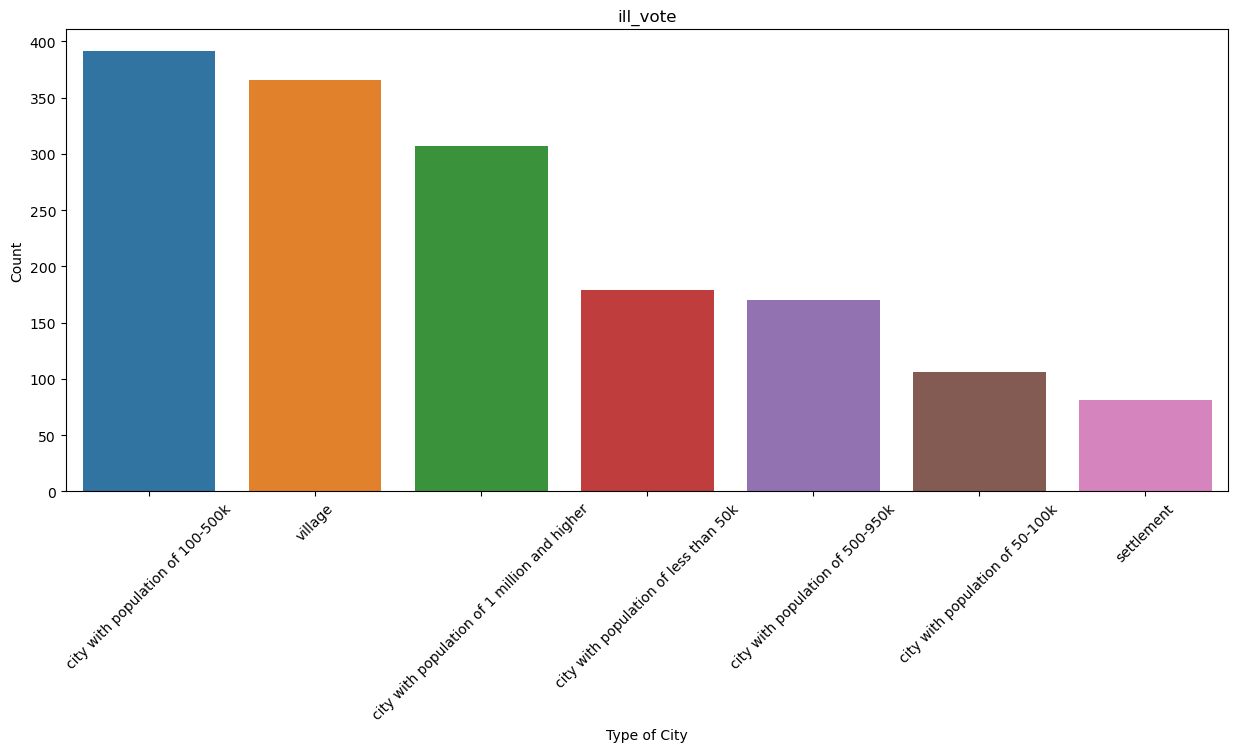

In [51]:
plt.figure(figsize=(15, 6))
sns.countplot(x='type_of_city', data=data, order=data['type_of_city'].value_counts().index)
plt.xticks(rotation=45)
plt.title('ill_vote')
plt.xlabel('Type of City')
plt.ylabel('Count')
plt.show()